# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente sauf si une copie locale est disponible.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"
local_copy = "varicelle_local_copy.csv"
import urllib.request
import os.path
if not os.path.isfile(local_copy):
    urllib.request.urlretrieve(data_url, local_copy)

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(local_copy, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202502          7   7332     2924   11740      11           4   
1     202501          7   6125     2464    9786       9           4   
2     202452          7   4356     1776    6936       7           3   
3     202451          7   4670     2239    7101       7           3   
4     202450          7   7363     4438   10288      11           7   
5     202449          7   6077     3631    8523       9           5   
6     202448          7   4189     1454    6924       6           2   
7     202447          7   1931      726    3136       3           1   
8     202446          7   2260      863    3657       3           1   
9     202445          7   2713     1216    4210       4           2   
10    202444          7   2135      676    3594       3           1   
11    202443          7   2124      641    3607       3           1   
12    202442          7   2621     1246    3996       4           2   
13    202441          7   2035      381    3689       3           1   
14    202440          7   2125      725    3525       3           1   
15    202439          7   2898     1333    4463       4           2   
16    202438          7    751        0    1513       1           0   
17    202437          7    916       28    1804       1           0   
18    202436          7   2235      870    3600       3           1   
19    202435          7   1620      285    2955       2           0   
20    202434          7   2560      622    4498       4           1   
21    202433          7   1971      536    3406       3           1   
22    202432          7   4399     1944    6854       7           3   
23    202431          7   4500     2213    6787       7           4   
24    202430          7   7004     4278    9730      11           7   
25    202429          7   9270     6303   12237      14          10   
26    202428          7   9364     6498   12230      14          10   
27    202427          7  10247     7090   13404      15          10   
28    202426          7  14368    10399   18337      22          16   
29    202425          7  11174     8039   14309      17          12   
...      ...        ...    ...      ...     ...     ...         ...   
1750  199126          7  17608    11304   23912      31          20   
1751  199125          7  16169    10700   21638      28          18   
1752  199124          7  16171    10071   22271      28          17   
1753  199123          7  11947     7671   16223      21          13   
1754  199122          7  15452     9953   20951      27          17   
1755  199121          7  14903     8975   20831      26          16   
1756  199120          7  19053    12742   25364      34          23   
1757  199119          7  16739    11246   22232      29          19   
1758  199118          7  21385    13882   28888      38          25   
1759  199117          7  13462     8877   18047      24          16   
1760  199116          7  14857    10068   19646      26          18   
1761  199115          7  13975     9781   18169      25          18   
1762  199114          7  12265     7684   16846      22          14   
1763  199113          7   9567     6041   13093      17          11   
1764  199112          7  10864     7331   14397      19          13   
1765  199111          7  15574    11184   19964      27          19   
1766  199110          7  16643    11372   21914      29          20   
1767  199109          7  13741     8780   18702      24          15   
1768  199108          7  13289     8813   17765      23          15   
1769  199107          7  12337     8077   16597      22          15   
1770  199106          7  10877     7013   14741      19          12   
1771  199105          7  10442     6544   14340      18          11   
1772  199104          7   7913     4563   11263      14           8   
1773  199103          7  15387    10484   20290      27          18   
1774  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? 

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Pas pour l'instant, nous pouvons utiliser les données sans pré-traitement

In [5]:
data = raw_data

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète. 

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vontdans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique. 

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Tout va bien.

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

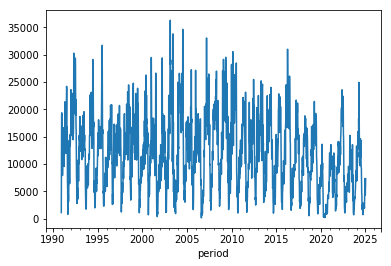

In [9]:
sorted_data['inc'].plot()

Un zoom sur les dernières années.

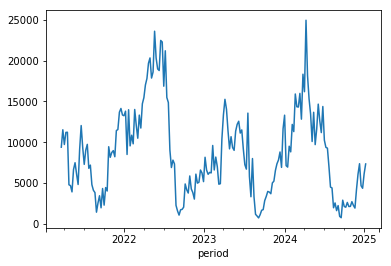

In [10]:
sorted_data['inc'][-200:].plot()

# Etude de l'incidence annuelle
Par consigne de l'exercice, nous définissons la période de référence, du 1er septembre de l'année $N$ au 1er septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er septembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Encore un petit détail: les données commencent an decembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [11]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

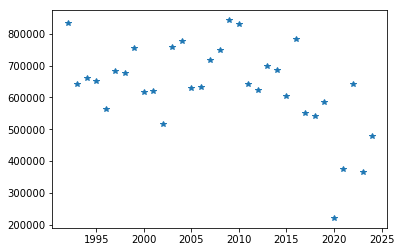

In [13]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2024    479258
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64